In [180]:
from textblob import TextBlob
import spacy
from spacy.lang.en import English
from spacy import displacy
import en_core_web_sm
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect 
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
print("Libraries Imported")

Libraries Imported


In [181]:
consumerKey = "cXOzZBpX78BW0HRmmS9hcDM5c"
consumerSecret = "55uqYYrGhw0Ca7QQhIUFH2t1K6k7IliYckfofUSCVhufSJ71H6"
accessToken = "1083286165845954560-LBqZLPApyhVsouDh8XzPoEQ1yPDWmO"
accessTokenSecret = "4bb8cDkRDH63lpYiNjIy4m9DIMH4hw9FktWR6X7gzCeBq"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

print("API Authentication")

API Authentication


In [182]:
nlp = English()

In [183]:
def tweet_cleaning(x): #remove link
    remove_RT = lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip())
    x = remove_RT(x)
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            x = x.replace(separator,' ')
    words = []
    for word in x.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [184]:
def tweet_sentiment_analysis(x):
    the_tweet = TextBlob(x)
    pol = the_tweet.sentiment.polarity
    sub = the_tweet.sentiment.subjectivity
    score = SentimentIntensityAnalyzer().polarity_scores(x)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    comp = score['compound']
    sentiment = ''
    if pos > neg :
        sentiment = 'Positive'
    elif pos < neg :
        sentiment = 'Negative'
    else :
        sentiment = 'Neutral'
    return int(pol*100), int(sub*100), score, int(neg*100),int(pos*100) , int(neu*100), int(comp*100),sentiment

In [185]:
def tweet_tokenizer(x) :
    text = x
    my_doc = nlp(text)
    tokens = []
    for token in my_doc :
        tokens.append(token.text)
    return tokens

In [186]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [193]:
def get_tweets(keyword, noOfTweet) :
    tweets = tweepy.Cursor(api.search,q=keyword, lang="en").items(noOfTweet)
    tweet_list = []
    cleaned_tweets_list = []
    for tweet in tweets :
        tweet_list.append(tweet.text)
        cleaned_tweet = tweet_cleaning(tweet.text)
        cleaned_tweets_list.append(cleaned_tweet)
    return tweet_list,cleaned_tweets_list

In [199]:
def get_sentiment_percentage(cleaned_tweets_list, positive_tweet_list, negative_tweet_list, neutral_tweet_list) :
    positive_percentage = percentage(len(positive_tweet_list), len(cleaned_tweets_list))
    negative_percentage = percentage(len(negative_tweet_list), len(cleaned_tweets_list))
    neutral_percentage = percentage(len(neutral_tweet_list), len(cleaned_tweets_list))
    return positive_percentage, negative_percentage, neutral_percentage


% of tweets that are positive: 45.1
% of tweets that are negative: 13.6
% of tweets that are neutral: 41.3


In [194]:
def final_data_generation(cleaned_tweets_list) :
    counter = 0 
    polarity_list = []
    subjectivity_list = []
    positive_tweet_list = []
    negative_tweet_list = []
    neutral_tweet_list = []
    score_tweet_list = []
    positivty = []
    negativity = []
    neutralness = []
    compoundness = []
    df_tweetdata = pd.DataFrame(columns = ['Tweet','Polarity','Subjectivity','Sentiment','Positivity','Negativity','Neutralness','Compoundness'])
    
    for x in cleaned_tweets_list :
        tweet_pol, tweet_sub, score, neg, pos, neu, comp, sentiment = tweet_sentiment_analysis(x)
        
        positivty.append(pos)
        negativity.append(neg)
        neutralness.append(neu)
        compoundness.append(comp)
        polarity_list.append(tweet_pol)
        subjectivity_list.append(tweet_sub)
        score_tweet_list.append(sentiment)
        
        if pos > neg :
            positive_tweet_list.append(x)        
        elif neg > pos :
            negative_tweet_list.append(x)
        elif pos == neg :
            neutral_tweet_list.append(x)
    
    df_tweetdata['Tweet'] = cleaned_tweets_list
    df_tweetdata['Polarity'] = polarity_list
    df_tweetdata['Subjectivity'] = subjectivity_list
    df_tweetdata['Sentiment'] = score_tweet_list
    df_tweetdata['Positivity'] = positivty
    df_tweetdata['Negativity'] = negativity
    df_tweetdata['Neutralness'] = neutralness
    df_tweetdata['Compoundness'] = compoundness
    
    positive_percentage, negative_percentage, neutral_percentage = get_sentiment_percentage(cleaned_tweets_list, positive_tweet_list, negative_tweet_list, neutral_tweet_list)
    
    return polarity_list,subjectivity_list,positive_percentage,negative_percentage,neutral_percentage,score_tweet_list,positivty,negativity,neutralness,compoundness,df_tweetdata

In [198]:
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweet_list, cleaned_tweets_list = get_tweets(keyword, noOfTweet)
polarity_list,subjectivity_list,positive_percentage, negative_percentage, neutral_percentage,score_tweet_list,positivty,negativity,neutralness,compoundness,df_tweetdata = final_data_generation(cleaned_tweets_list)


Please enter keyword or hashtag to search:  spacex
Please enter how many tweets to analyze:  1000


In [220]:
print("Percentage of Positive:\t",positive_percentage)
print("Percentage of Negative:\t",negative_percentage)
print("Percentage of Neutral:\t",neutral_percentage)

Percentage of Positive:	 45.1
Percentage of Negative:	 13.6
Percentage of Neutral:	 41.3


In [104]:
# cleaned_tweets_list = []
# for x in tweet_list :
#     cleaned_tweet = tweet_cleaning(x)
#     cleaned_tweets_list.append(cleaned_tweet)
# len(cleaned_tweets_list)

1000

In [105]:
#The compound score is the sum of positive, negative & neutral scores which is then normalized 
#between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text.

In [136]:
# counter = 0 
# polarity_list = []
# subjectivity_list = []
# positive_tweet_list = []
# negative_tweet_list = []
# neutral_tweet_list = []
# score_tweet_list = []
# positivty = []
# negativity = []
# neutralness = []
# compoundness = []
# df_tweetdata = pd.DataFrame(columns = ['Tweet','Polarity','Subjectivity','Sentiment','Positivity','Negativity','Neutralness','Compoundness'])
# for x in cleaned_tweets_list :
#     tweet_pol, tweet_sub, score, neg, pos, neu, comp, sentiment = tweet_sentiment_analysis(x)
#     #print(counter+1,"\n","Tweet:",x,"\nPolarity:", tweet_pol,"\nSubjectivity",tweet_sub,"\nScore: Neg", neg, "Pos", pos, "Neutral", neu, "Compound", comp)
#     positivty.append(pos)
#     negativity.append(neg)
#     neutralness.append(neu)
#     compoundness.append(comp)
#     polarity_list.append(tweet_pol)
#     subjectivity_list.append(tweet_sub)
#     score_tweet_list.append(sentiment)
#     if pos > neg :
#         positive_tweet_list.append(x)        
#     elif neg > pos :
#         negative_tweet_list.append(x)
#     elif pos == neg :
#         neutral_tweet_list.append(x)
# df_tweetdata['Tweet'] = cleaned_tweets_list
# df_tweetdata['Polarity'] = polarity_list
# df_tweetdata['Subjectivity'] = subjectivity_list
# df_tweetdata['Sentiment'] = score_tweet_list
# df_tweetdata['Positivity'] = positivty
# df_tweetdata['Negativity'] = negativity
# df_tweetdata['Neutralness'] = neutralness
# df_tweetdata['Compoundness'] = compoundness


In [197]:
df_tweetdata.head(20)

,Tweet,Polarity,Subjectivity,Sentiment,Positivity,Negativity,Neutralness,Compoundness
0,Tug Finn Falgout is hooking up to A Shortfall ...,0,0,Positive,12,0,87,36
1,SpaceX While I think governments overstated th...,43,73,Positive,19,10,70,26
2,There s no coin like Marscoin Marscoin Marscoi...,0,0,Positive,15,14,70,7
3,Tug Finn Falgout is hooking up to A Shortfall ...,0,0,Positive,12,0,87,36
4,SpaceX has posted that iconic black and white ...,11,31,Positive,18,0,81,63
5,CGI IRL Only comic books and movies ever talke...,12,75,Neutral,0,0,100,0
6,SpaceX continues testing Raptor rocket engines...,0,0,Neutral,0,0,100,0
7,Tug Finn Falgout is hooking up to A Shortfall ...,0,0,Positive,12,0,87,36
8,NASA rover marks nine years on Mars with glori...,12,62,Positive,18,0,81,63
9,SpaceX Starlink satellites responsible for ove...,1,35,Positive,11,0,88,31


In [200]:
df_tweetdata.shape

(1000, 8)

In [201]:
df_tweetdata.drop_duplicates(inplace=True)
df_tweetdata.reset_index(inplace=True)

In [202]:
df_tweetdata.shape

(539, 9)

In [203]:
#df_tweetdata.to_csv('Tweet_Hype_Data_2.csv')

In [204]:
token_list = []
index_list = []
counter = 0
for x in cleaned_tweets_list:
    tokens = tweet_tokenizer(x)
    token_list.append(tokens)
    counter += len(tokens)
    index_list.append(counter)

In [205]:
#printed out token_list and index_list
print("cleaned_tweets_list",len(cleaned_tweets_list))
print("token_list",len(token_list))

cleaned_tweets_list 1000
token_list 1000


In [208]:
tweet_tokens = []
tweet_POS = []
for x in cleaned_tweets_list :
    tokens_POS = TextBlob(x)
    res = [[ i for i, j in tokens_POS.tags ],[ j for i, j in tokens_POS.tags ]]
#     for y in res :
#         tweet_tokens.append(y[0])
#         tweet_POS.append(y[1])
    #print(tokens_POS.tags)
    #tokens_POS_list.append(tokens_POS.tags)


In [209]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_tweetdata.Sentiment = enc.fit_transform(df_tweetdata.Sentiment)
# df_tweetdata.Polarity = enc.fit_transform(df_tweetdata.Polarity)
# df_tweetdata.Subjectivity = enc.fit_transform(df_tweetdata.Subjectivity)
# df_tweetdata.Positivity = enc.fit_transform(df_tweetdata.Positivity)
# df_tweetdata.Negativity = enc.fit_transform(df_tweetdata.Negativity)
# df_tweetdata.Neutralness = enc.fit_transform(df_tweetdata.Neutralness)
# df_tweetdata.Compoundness = enc.fit_transform(df_tweetdata.Compoundness)

In [211]:
df_tweetdata.head(10)

,index,Tweet,Polarity,Subjectivity,Sentiment,Positivity,Negativity,Neutralness,Compoundness
0,0,SpaceX There is no guarantee that if everyone ...,0,0,0,7,8,83,-5
1,1,SpaceX has posted that iconic black and white ...,11,31,2,18,0,81,63
2,3,At least they dont trash talk SpaceX https t c...,-30,40,1,0,0,100,0
3,4,That s not possible for the forward flaps If y...,0,100,1,0,0,100,0
4,6,Tug Finn Falgout is hooking up to A Shortfall ...,0,0,2,12,0,87,36
5,7,SpaceX While I think governments overstated th...,43,73,2,19,10,70,26
6,8,There s no coin like Marscoin Marscoin Marscoi...,0,0,2,15,14,70,7
7,11,CGI IRL Only comic books and movies ever talke...,12,75,1,0,0,100,0
8,12,SpaceX continues testing Raptor rocket engines...,0,0,1,0,0,100,0
9,14,NASA rover marks nine years on Mars with glori...,12,62,2,18,0,81,63


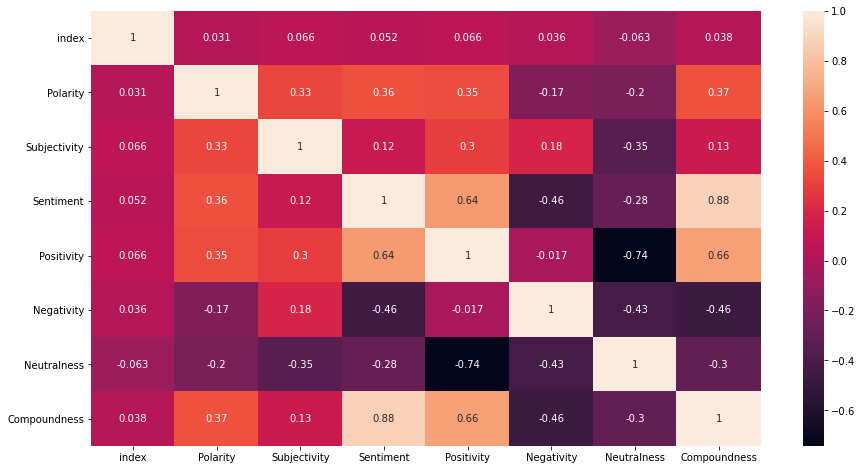

In [212]:
import seaborn as sns
c = df_tweetdata.corr(method = 'kendall')
plt.figure(figsize=(15,8))
sns.heatmap(c, annot=True)
plt.show()

In [213]:
feature_cols = ['Subjectivity','Sentiment','Positivity','Negativity','Compoundness']
X = df_tweetdata[feature_cols] # Features
y = df_tweetdata.Polarity # Target variable

In [214]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [215]:
logreg = LogisticRegression()

In [216]:
ts_score=[]
for j in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=j)
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    ts_score.append(metrics.accuracy_score(y_test, y_pred))

J= ts_score.index(np.max(ts_score))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=J)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7222222222222222


In [217]:
print(J)

531


In [219]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average=None))
print("Recall:",metrics.recall_score(y_test, y_pred,average=None))

Accuracy: 0.7222222222222222
Precision: [0.5        0.25       0.         0.         0.         0.
 0.         0.         0.84269663 0.         0.         0.
 0.         0.         0.25       0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Recall: [1.         1.         0.         0.         0.         0.
 0.         0.         0.96153846 0.         0.         0.
 0.         0.         0.5        0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
